# Chapter 2 Class Activity: Statistical Paradoxes

In data science and causal inference, paradoxes can often mislead our interpretation of the data. Two of the most common statistical paradoxes are Simpson’s Paradox and Berkson’s Paradox, both of which highlight the importance of understanding confounding variables and conditioning in data analysis.

In this section, we’ll explore these paradoxes with examples, visualizations, and an activity for deeper exploration.

<br/>

## 1. Simpson’s Paradox

* **Simpson’s Paradox** occurs when a trend observed in several groups of data reverses or disappears when the groups are combined. 
* This paradox often arises due to the presence of a **confounder** or **latent variable** that affects the relationship between the variables being analyzed. 
* When we ignore the confounder, we might mistakenly believe that one variable causes another, but when we account for the hidden variable, the relationship reverses, revealing the true nature of the data.

### Example: Firefighters and Injuries

Let’s consider an example where we study the relationship between the number of firefighters deployed to fight a fire and the number of injuries caused by the fire.

- **Initial Observation**: We observe a **positive correlation** between the number of firefighters and the number of injuries, which suggests that more firefighters might be causing more injuries—a counterintuitive result!
  
- **Confounding Variable**: However, when we account for **fire severity**, which is positively correlated with both the number of firefighters deployed and the number of injuries, the relationship reverses. More severe fires require more firefighters and naturally cause more injuries.

This example illustrates why we must consider confounding variables in our analysis. Without them, we risk making incorrect conclusions about cause-and-effect relationships.

Following are some visualization regarding this example.

**Scatter Plot and Regression Before Considering Fire Severity:**


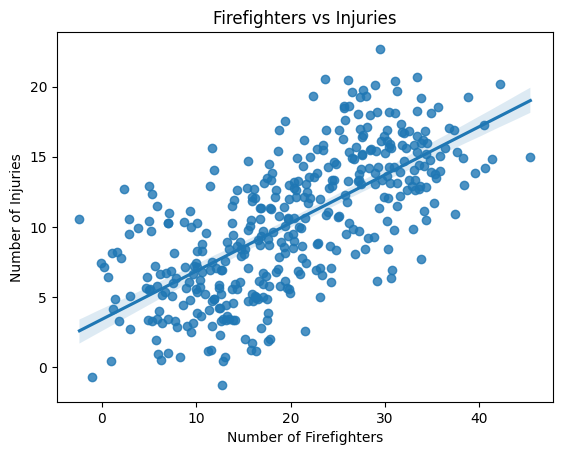

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate data
np.random.seed(42)
n = 400
severity = np.random.randint(1, 4, n)  # Fire severity (1 = low, 2 = medium, 3 = high)
firefighters = severity * 10 + np.random.normal(0, 5, n)  # More severe fires have more firefighters
injuries = severity * 5 + np.random.normal(0, 3, n)  # More severe fires cause more injuries

data = pd.DataFrame({'Firefighters': firefighters, 'Injuries': injuries, 'Severity': severity})

# Scatter plot without considering severity
sns.regplot(x='Firefighters', y='Injuries', data=data)
plt.title("Firefighters vs Injuries")
plt.xlabel("Number of Firefighters")
plt.ylabel("Number of Injuries")
plt.show()


**Scatter Plot and Regression After Considering Fire Severity:**

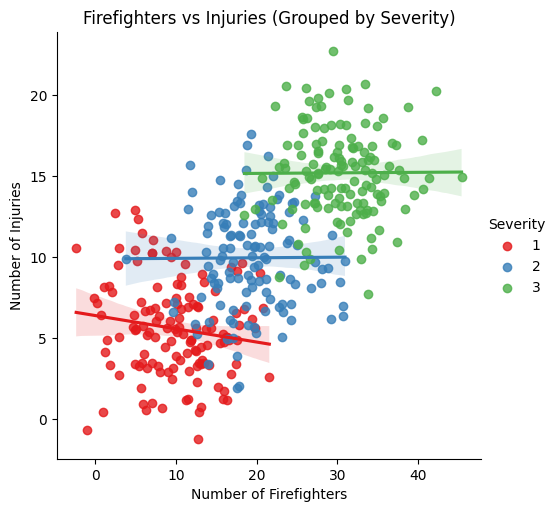

In [118]:
# Scatter plot considering severity levels
sns.lmplot(x='Firefighters', y='Injuries', hue='Severity', data=data, palette='Set1')
plt.title("Firefighters vs Injuries (Grouped by Severity)")
plt.xlabel("Number of Firefighters")
plt.ylabel("Number of Injuries")
plt.show()


**DAG for Simpson’s Paradox (Firefighters and Injuries):**

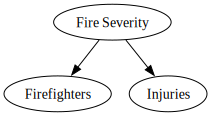

In [120]:
import graphviz
from IPython.display import display

# Create DAG for Simpson's Paradox
dot = graphviz.Digraph()

dot.node('Firefighters')
dot.node('Injuries')
dot.node('Fire Severity')

dot.edge('Fire Severity', 'Firefighters')
dot.edge('Fire Severity', 'Injuries')

# Display the DAG
display(dot)


### Questions:
- Why does the correlation between firefighters and injuries change when we account for fire severity?
- Can you think of other real-world examples where Simpson’s Paradox might occur?
- What would happen if you ignore the latent variable when interpreting the data?

## 2. Berkson’s Paradox
   
* Berkson’s Paradox occurs when two independent variables appear to be correlated due to conditioning on a third variable, known as a collider. 
* This often results in selection bias, which distorts the relationship between variables.

## Example: COVID-19 and Bone Fractures
In this example, we explore a study that shows an observed negative correlation between COVID-19 severity and bone fracture severity. However, this relationship is spurious due to conditioning on hospitalization—a collider variable.

Following are some visualization regarding this example.


**Scatter Plot and Regression Before Considering Hospitalization:**

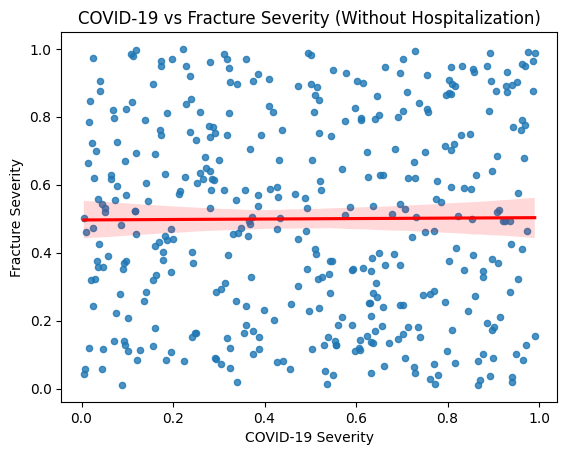

In [123]:
# Simulate data for COVID-19 severity and bone fractures
np.random.seed(42)
n = 400
covid_severity = np.random.rand(n)
fracture_severity = np.random.rand(n)

# Scatter plot with regression line before considering hospitalization
sns.regplot(x=covid_severity, y=fracture_severity, scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.title("COVID-19 vs Fracture Severity (Without Hospitalization)")
plt.xlabel("COVID-19 Severity")
plt.ylabel("Fracture Severity")
plt.show()



**Scatter Plot and Regression After Considering Hospitalization:**

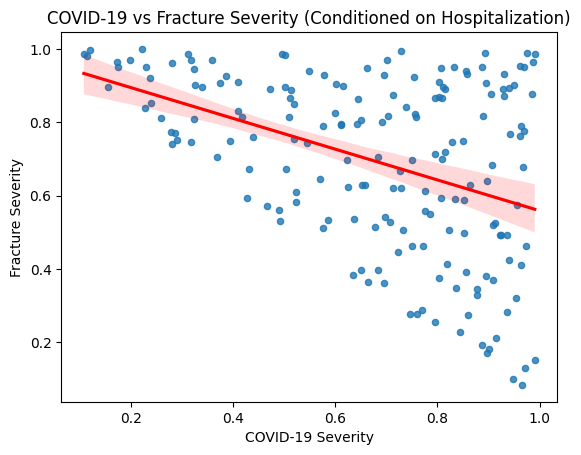

In [125]:
# Simulate hospitalization as a collider (people with severe COVID-19 or fractures more likely to be hospitalized)
hospitalization = (covid_severity + fracture_severity) > 1.0  # Collide on hospitalization


# Scatter plot with regression line after conditioning on hospitalization
sns.regplot(x=covid_severity[hospitalization], y=fracture_severity[hospitalization], scatter_kws={"s": 20}, line_kws={"color": "red"})
plt.title("COVID-19 vs Fracture Severity (Conditioned on Hospitalization)")
plt.xlabel("COVID-19 Severity")
plt.ylabel("Fracture Severity")
plt.show()



**DAG for Berkson’s Paradox (COVID-19 and Bone Fractures):**

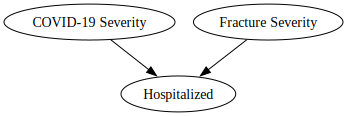

In [127]:
# Create DAG for Berkson's Paradox
dot = graphviz.Digraph()

dot.node('COVID-19 Severity')
dot.node('Fracture Severity')
dot.node('Hospitalized')

dot.edge('COVID-19 Severity', 'Hospitalized')
dot.edge('Fracture Severity', 'Hospitalized')

# Display the DAG
display(dot)


## Questions:
- What role does hospitalization play as a collider in this example?
- How does conditioning on hospitalization create a false correlation between COVID-19 severity and bone fractures?
- Can you think of other examples in medical studies or social sciences where Berkson’s Paradox might occur?


## Catalog of Bias

To better understand the impact of biases, a group in Oxford University and other institutes are compiling a Catalogue of Bias, stemming from original work by David Sackett. The entries are a work in progress and describe a wide range of biases –  outlining their potential impact in research studies.

Check their webpage [here](https://catalogofbias.org).
